In [1]:
from IPython.display import HTML
import geopandas as gpd
import pandas as pd


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# We use raw data from: 
# https://www.hydrosheds.org/products/hydrorivers
# https://www.arcgis.com/home/item.html?id=ae25571c60d94ce5b7fcbf74e27c00e0

### Here we extract visual information for quality control and display.

In [4]:
# We have data for all states if this will become necessary in the future.
country_index,naming = [9,10,11,12,13,14], "east_german"
# Run this twice for both maps. select one below.
country_index, naming = [7], "bavaria"

<Axes: >

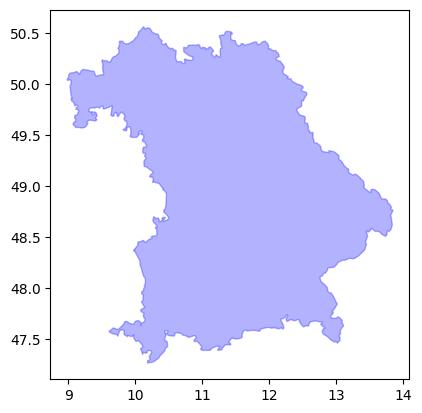

In [6]:
fp =  "visualization/geomaps/vg2500_bld.shp"
map_df = gpd.read_file(fp)
map_df = map_df.loc[country_index]
map_df.plot(color="blue", alpha=0.3, linewidth=1, edgecolor='blue')

In [6]:
# This loads a bit
fp =  "visualization/HydroRIVERS_v10_eu_shp/HydroRIVERS_v10_eu.shp"
r_df = gpd.read_file(fp)
#r_df.plot(color="blue", alpha=0.3, linewidth=1, edgecolor='blue')

In [7]:
# Different filter to check all relevant rivers that match with the state template.
crossings = []
for x in map_df.index:
    crossings.append(map_df.loc[x, "geometry"].boundary.crosses(r_df.loc[:, "geometry"]))
crossings = r_df[pd.concat(crossings,axis=1).any(axis=1)]

In [8]:
contains = []
for x in map_df.index:
    contains.append(map_df.loc[x, "geometry"].contains(r_df.loc[:, "geometry"]))
contains = r_df[pd.concat(contains,axis=1).any(axis=1)]

In [9]:
intersect = []
for x in map_df.index:
    intersect.append(map_df.loc[x, "geometry"].contains(r_df.loc[:, "geometry"]))
intersect = r_df[pd.concat(intersect,axis=1).any(axis=1)]

<Axes: >

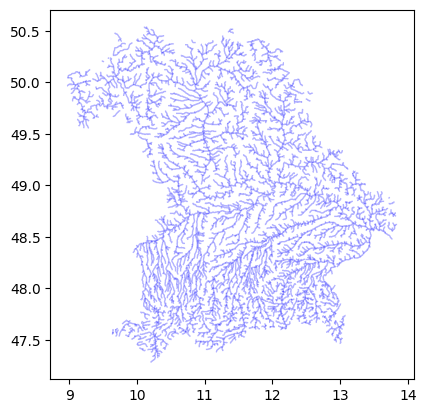

In [10]:
pd.concat([crossings, contains,intersect]).drop_duplicates(subset = "HYRIV_ID").plot(alpha=0.3, linewidth=1, edgecolor='blue')

In [11]:
pd.concat([crossings, contains,intersect]).drop_duplicates(subset = "HYRIV_ID").to_file("../product/river_" + naming + "_map.shp")
map_df.to_file("../product/" + naming + "_map.shp")